<a href="https://colab.research.google.com/github/SuriyaKris/Anomaly-Detection-in-MachineLearning/blob/main/AnomalyDetection_on_Cpu_Utilization_values(IsolationForest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [16]:
#Importing the CPU Utilization values dataset
df = pd.read_csv('/content/drive/MyDrive/MLDatasets/CPU_UTILIZATION.csv')
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [17]:
# Defining a list of known anomaly timestamps for later use
anomalies_timestamp = [
        "2014-02-26 22:05:00",
        "2014-02-27 17:15:00"
    ]

In [18]:
df['timestamp'] = pd.to_datetime(df['timestamp']) #Converting the timestamp column to datetime format for easier manipulation and analysis.

df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [21]:
df['is_anomaly'] = 1 # Adding a new column is_anomaly to the dataframe and initializing all values to 1 (assuming all points are normal initially).
#Marking the known anomalies in the dataframe by setting the is_anomaly column to -1 for the corresponding timestamps.
for each in anomalies_timestamp:
    df.loc[df['timestamp'] == each, 'is_anomaly'] = -1

df.head()

,timestamp,value,is_anomaly
0,2014-02-14 14:30:00,0.132,1
1,2014-02-14 14:35:00,0.134,1
2,2014-02-14 14:40:00,0.134,1
3,2014-02-14 14:45:00,0.134,1
4,2014-02-14 14:50:00,0.134,1


In [30]:
#Creating separate dataframes for anomalies (anomaly_df) and normal points (inlier_df).
anomaly_df = df.loc[df['is_anomaly'] == -1]#label anomalies as -1
inlier_df = df.loc[df['is_anomaly'] == 1]#label inliers as 1

In [23]:
#Splitting the dataframe into training and testing sets
train = df[:3550]
test = df[3550:]

In [24]:
#Importing the Isolation Forest algorithm from sklearn
from sklearn.ensemble import IsolationForest
contamination = 1/len(train) #Calculating the contamination parameter.
                              #It represents the proportion of outliers in the dataset. Here, it's set to 1/len(train), assuming there is one anomaly in the training set.

iso_forest = IsolationForest(contamination=contamination, random_state=42)#Creating an instance of the Isolation Forest with the specified contamination and a fixed random state for reproducibility.
#Reshaping the training data to a 2D array as required by the model and fitting the Isolation Forest on the training data.
X_train = train['value'].values.reshape(-1,1)
iso_forest.fit(X_train)

IsolationForest(contamination=0.00028169014084507044, random_state=42)

In [25]:
pred_iso_forest = iso_forest.predict(test['value'].values.reshape(-1,1)) #predicting the anomalies in the test dataset

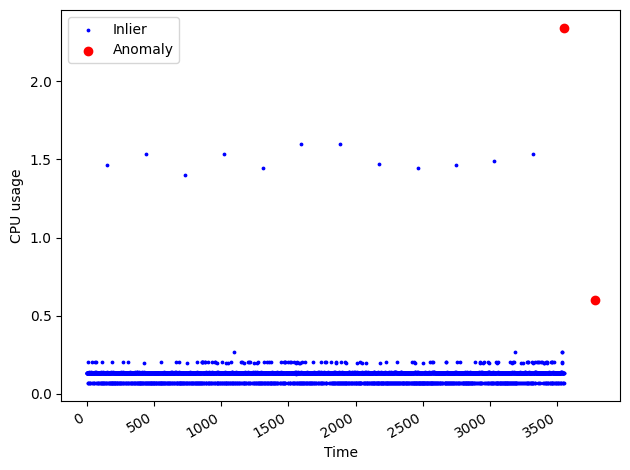

In [29]:
#Plotting the training data points with inliers in blue and anomalies in red.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(train.index, train['value'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['value'], color='red', label='Anomaly')
ax.set_xlabel('Time')
ax.set_ylabel('CPU usage')
ax.legend(loc=2)

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()


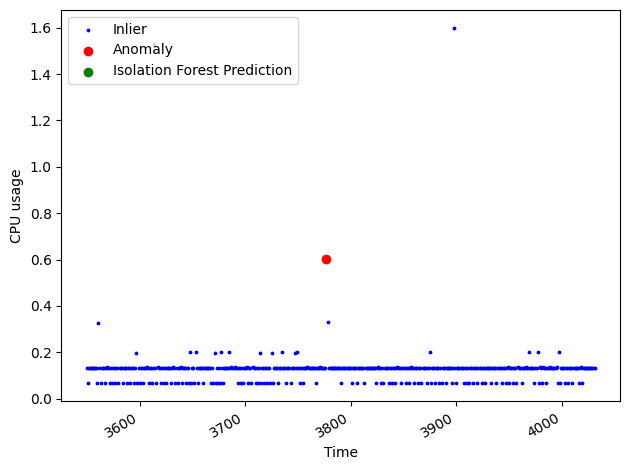

In [26]:
#ploting anomalies and datapoints for test-set
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(test.index, test['value'], color='blue', s=3, label='Inlier')
ax.scatter(test.loc[test['is_anomaly'] == -1].index, test.loc[test['is_anomaly'] == -1]['value'], color='red', label='Anomaly')
ax.scatter(test.loc[pred_iso_forest == -1].index, test.loc[pred_iso_forest == -1]['value'], color='green', label='Isolation Forest Prediction')
ax.set_xlabel('Time')
ax.set_ylabel('CPU usage')
ax.legend(loc=2)

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()


In [27]:
#calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

y_true = test['is_anomaly']
y_pred = pred_iso_forest

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy score:", accuracy)


Accuracy score: 0.9979253112033195
